In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [130]:
df_1 = pd.read_excel('../Data/Self assessment and Test Center.xlsx', engine='openpyxl')
df_2 = pd.read_excel('../Data/TS2018-2019_AISS.xlsx', engine='openpyxl')
df_3 = pd.read_excel('../Data/Variables and questions.xlsx', engine='openpyxl')

In [131]:
print(df_1.info)
# print(df_2.head())
# print(df_3.head())

<bound method DataFrame.info of                                        Id  lft_jr lft_cat  g  JO_team  Finals  \
0    014419E9-9730-41DC-8813-337E83118E63      12   11_12  1        0       0   
1    0373C5A4-0433-421D-81F5-F3D2C4B51251       7   00_08  0        0       0   
2    04D241B6-F1BB-4C48-8457-9F9127AE918C       8   00_08  0        0       0   
3    0578E3BC-DA4B-4B57-8D6A-F071804FFF2E      11   11_12  0        0       0   
4    06441EB7-3B47-453A-A71B-614B576B7215       8   00_08  1        0       0   
..                                    ...     ...     ... ..      ...     ...   
273  F678B02A-F941-4D03-833F-276BBBCE7475      10   09_10  0        0       0   
274  F9C7E58D-CDDC-494C-8124-BD07B97F5217       9   09_10  0        0       0   
275  FC06A844-0A2F-4027-BB6B-5D92B35951AC      10   09_10  0        0       0   
276  FE4BA400-8125-45A9-967C-5910D20824D4      12   11_12  0        0       0   
277  FECB0630-8FEE-4F4F-82D3-6F748A5E707E      11   11_12  0        0       0

In [132]:
# Calculating BMI from weight and height
df_1['bmi'] = df_1['X109_08']/(df_1['X109_07'] ** 2)

In [133]:
# df = df.drop(['Id', 'lft_cat'], axis=1)
numeric_columns = df_1.select_dtypes(include=['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']).columns
df_1 = df_1[numeric_columns]
print(df_1.head())

   lft_jr  g  JO_team  Finals  X01_01  X01_02  X01_03  X01_04  X01_05  X01_06  \
0      12  1        0       0       5       5       5       5       5       5   
1       7  0        0       0       4       4       4       5       5       5   
2       8  0        0       0       4       5       5       5       4       4   
3      11  0        0       0       4       4       4       5       4       5   
4       8  1        0       0       1       5       5       5       5       5   

   ...  X108_03  X108_04  X108_05  X109_01  X109_02  X109_04  X109_06  \
0  ...        0       71        1        3        3        3        1   
1  ...        0       56        4        4        1        1        1   
2  ...        0       53        5        5        3        4        3   
3  ...        2       51        1        3        5        4        4   
4  ...        3       56        1        2        3        3        4   

   X109_07  X109_08       bmi  
0      162     49.0  0.001867  
1      145

In [134]:
df_1.X108_04

0      71
1      56
2      53
3      51
4      56
       ..
273    81
274    75
275    78
276    61
277     0
Name: X108_04, Length: 278, dtype: int64

In [135]:
# Select the column to transform
column = df_1["X108_04"]

# Normalize the values in the column
min_value = column.min()
max_value = column.max()
normalized_column = (column - min_value) / (max_value - min_value)

# Transform the values to a Likert scale
likert_column = normalized_column * 5

# Round the values to the nearest integer
likert_column = np.round(likert_column)

# Replace the original column with the Likert scale column
df_1["X108_04"] = likert_column

In [136]:
df_1["X108_04"]

0      3.0
1      3.0
2      2.0
3      2.0
4      3.0
      ... 
273    4.0
274    3.0
275    4.0
276    3.0
277    0.0
Name: X108_04, Length: 278, dtype: float64

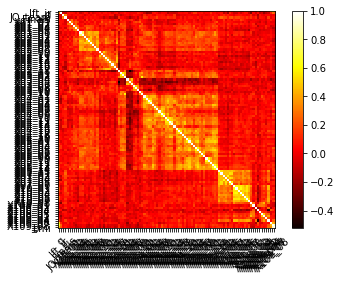

In [137]:
# Compute the correlation matrix
corr = df_1.corr()

# Plot the correlation matrix using a heatmap
plt.figure()
plt.imshow(corr, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(df_1.columns)), df_1.columns, rotation=45)
plt.yticks(range(len(df_1.columns)), df_1.columns)
plt.show()

# Removing rows with missing values

In [138]:
# Remove rows with missing values
df_1 = df_1.dropna()

In [139]:
df_1.info

<bound method DataFrame.info of      lft_jr  g  JO_team  Finals  X01_01  X01_02  X01_03  X01_04  X01_05  \
0        12  1        0       0       5       5       5       5       5   
1         7  0        0       0       4       4       4       5       5   
2         8  0        0       0       4       5       5       5       4   
5         8  0        0       0       3       5       5       5       5   
6        15  0        0       1       2       4       4       5       5   
..      ... ..      ...     ...     ...     ...     ...     ...     ...   
273      10  0        0       0       5       5       4       5       5   
274       9  0        0       0       5       5       5       5       5   
275      10  0        0       0       5       5       5       5       5   
276      12  0        0       0       5       5       5       5       5   
277      11  0        0       0       4       5       4       5       5   

     X01_06  ...  X108_03  X108_04  X108_05  X109_01  X109_02  X109

# Standardize the Data
PCA is affected by the scale, so we have to scale the features using. StandardScaler whcih will help us standardize the dataset’s features onto unit scale (mean = 0 and variance = 1)

In [140]:
pca = PCA(n_components = 0.95)
df_1_pca = pca.fit_transform(df_1)

print(len(df_1_pca[0]))

ValueError: Input X contains infinity or a value too large for dtype('float64').

In [141]:
print(pca.explained_variance_ratio_)

AttributeError: 'PCA' object has no attribute 'explained_variance_ratio_'

## Spliting the dataframe into training and testing sets

In [142]:
from sklearn.model_selection import train_test_split

# Split the data into input and output variables
X = df_1.drop('Finals', axis=1)
y = df_1['Finals']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Applyinh logistic regression

In [143]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on new data
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

ValueError: Input X contains infinity or a value too large for dtype('float64').

In [ ]:
print(len(predictions))
print(len(y))

# Distribution

Since the data we got from the client is already encoded, no further preprocessing is needed

# Evaluation